In [3]:
import pandas as pd
version = 2

In [4]:
data = pd.read_csv(f"results/results{version}.csv", header=0)
data.columns = ['NAME', 'QUERY', 'NDCG', 'ALPHA-NDCG', 'TREC', 'AWRF']
data["NDCG"] = [float(x) for x in data["NDCG"]]
data["ALPHA-NDCG"] = [float(x) for x in data["ALPHA-NDCG"]]
data["TREC"] = [float(x) for x in data["TREC"]]
data["AWRF"] = [float(x) for x in data["AWRF"]]

grouped = data.groupby("NAME")

In [5]:
print(data.groupby("NAME").mean())
print(data)

       QUERY      NDCG  ALPHA-NDCG      TREC      AWRF
NAME                                                  
BM25   23.85  0.549619    0.776544  0.386612  0.712901
CL     23.85  0.511179    0.921788  0.366985  0.717220
FR     23.85  0.464303    0.795316  0.371244  0.783835
MMR    23.85  0.548078    0.858986  0.478544  0.885933
MMR_T  23.85  0.548078    0.858986  0.478544  0.885933
     NAME  QUERY      NDCG  ALPHA-NDCG      TREC      AWRF
0    BM25      2  0.903932    0.840937  0.505311  0.559014
1     MMR      2  0.854056    0.906375  0.808941  0.947176
2   MMR_T      2  0.854056    0.906375  0.808941  0.947176
3      CL      2  0.852929    0.912085  0.476799  0.559014
4      FR      2  0.642215    0.864158  0.558404  0.869497
..    ...    ...       ...         ...       ...       ...
95   BM25     43  1.000000    0.788085  0.470797  0.470797
96    MMR     43  1.000000    0.942096  0.734816  0.734816
97  MMR_T     43  1.000000    0.942096  0.734816  0.734816
98     CL     43  1.00000

In [6]:
UniqueNames = data["QUERY"].unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame() for elem in UniqueNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = data[:][ data["QUERY"] == key]

In [7]:
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

total = []
for key in DataFrameDict.keys():
    df = DataFrameDict[key][["NAME", "ALPHA-NDCG"]]
    df = df[df["NAME"] != "MMR"]
    df = df[df["NAME"] != "CL"]
    MMR =  float(DataFrameDict[key][ DataFrameDict[key]["NAME"]=="MMR"]["ALPHA-NDCG"])
    total.append( sum( [1 for x in df["ALPHA-NDCG"].values if MMR > x]))

print(Counter(total))

Counter({2: 19, 1: 1})


In [13]:
bm25_pop = pd.read_csv(f"results/bm25_pop{version}", index_col=0)
MMR_POP = pd.read_csv(f"results/MMR_POP{version}", index_col=0)
CL_POP = pd.read_csv(f"results/CL_POP{version}", index_col=0)
FR_POP = pd.read_csv(f"results/FR_POP{version}", index_col=0)
FR_POP

,female,male,NB
page_id,,,
1064,0.0,0.0,0.0
4654,0.0,0.0,0.0
14361,0.0,0.0,0.0
18940,0.0,0.0,0.0
20167,0.0,0.0,0.0
...,...,...,...
53856308,0.0,0.0,0.0
62629665,0.0,0.0,0.0
63470943,0.0,0.0,0.0


In [14]:
data = [
    ["BM25"]+list(bm25_pop.sum()/sum(bm25_pop.sum().values)),
    ["MMR"]+list(MMR_POP.sum()/sum(MMR_POP.sum().values)),
    ["CL"]+list(CL_POP.sum()/sum(CL_POP.sum().values)),
    ["FR"]+list(FR_POP.sum()/sum(FR_POP.sum().values))
]
df = pd.DataFrame(data, columns = ['origin','female', 'male', 'nb']) 
df = pd.melt(df, id_vars="origin", var_name="gender", value_name="proportion")
print(df)

   origin  gender  proportion
0    BM25  female    0.183784
1     MMR  female    0.232759
2      CL  female    0.183767
3      FR  female    0.134054
4    BM25    male    0.814865
5     MMR    male    0.764778
6      CL    male    0.816233
7      FR    male    0.865586
8    BM25      nb    0.001351
9     MMR      nb    0.002463
10     CL      nb    0.000000
11     FR      nb    0.000360


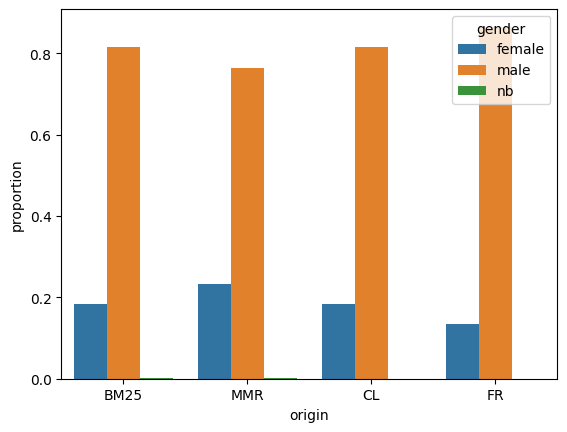

In [15]:
import seaborn as sns
bars = sns.barplot(df, x="origin", y="proportion", hue="gender")
fig = bars.get_figure()
fig.savefig("bars.png") 